# **Practica 1.3**
#### _Alberto García Doménech - Pablo Daurell Marina_ (Grupo 10)
***

## Parte 3 (Regresión)

In [1]:
import pandas as pd

In [2]:
# Cargamos el archivo csv
data = pd.read_csv('countries.csv', index_col=0)

# Eliminamos la variable Region
data = data.drop(columns={'Region'})
# Eliminamos las filas con valores vacios
data = data.dropna()

In [3]:
# Comprobamos si queda algún valor vacío
data.isnull().values.any()

False

In [123]:
# No quedan valores vacios, visualizamos parte de los datos y vemos que tampoco está la columna Region
data.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


#### 1) Descripción del conjunto de datos:
**Nombre:** Countries   
**Descripción:** Conjunto de 227 países con factores que afectan a su PIB per cápita  (GDP)    
**Tipos de cada variable:**

In [5]:
data.dtypes

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP (USD per capita)                  float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

**Estadísticos de cada variable:**

In [6]:
data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,294.805028,16.495196,-0.206536,38.898156,9125.698324,81.944134,208.151955,14.000447,4.440838,81.558212,2.108939,23.067486,9.465140,0.156905,0.288028,0.554508
std,1.317639e+08,1.395657e+06,1379.352557,73.977601,4.751216,35.353003,9644.123141,19.837537,210.121875,13.152405,8.090331,16.103748,0.697611,11.287207,5.210083,0.151343,0.140310,0.165670
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.188580e+06,1.991500e+04,26.800000,0.090000,-1.315000,9.990000,1800.000000,69.950000,27.100000,3.675000,0.230000,72.825000,2.000000,13.890000,5.795000,0.039000,0.197000,0.424500
50%,6.940432e+06,1.184800e+05,66.900000,0.630000,0.000000,24.310000,5100.000000,90.900000,137.100000,10.530000,1.030000,86.070000,2.000000,20.460000,7.840000,0.101000,0.274000,0.559000
75%,2.086014e+07,4.964410e+05,164.700000,5.355000,0.395000,64.605000,12950.000000,97.800000,335.000000,20.000000,4.600000,94.810000,2.500000,32.315000,11.660000,0.233000,0.349000,0.668500
max,1.313974e+09,9.631420e+06,16183.000000,870.660000,23.060000,163.070000,37800.000000,100.000000,898.000000,62.110000,48.960000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


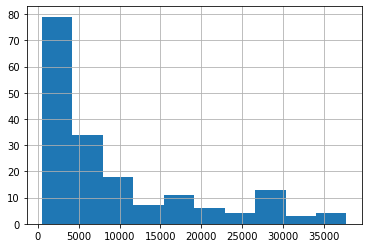

In [56]:
data['GDP (USD per capita)'].hist()

Vemos una distribución asimétrica sesgada a la derecha, donde la mayoría de países tiene un GDP entre 500 y 4000 aproximadamente, mientras que el número de países con mayor GDP son bastante menos.

**Matriz de gráficos de dispersión:**

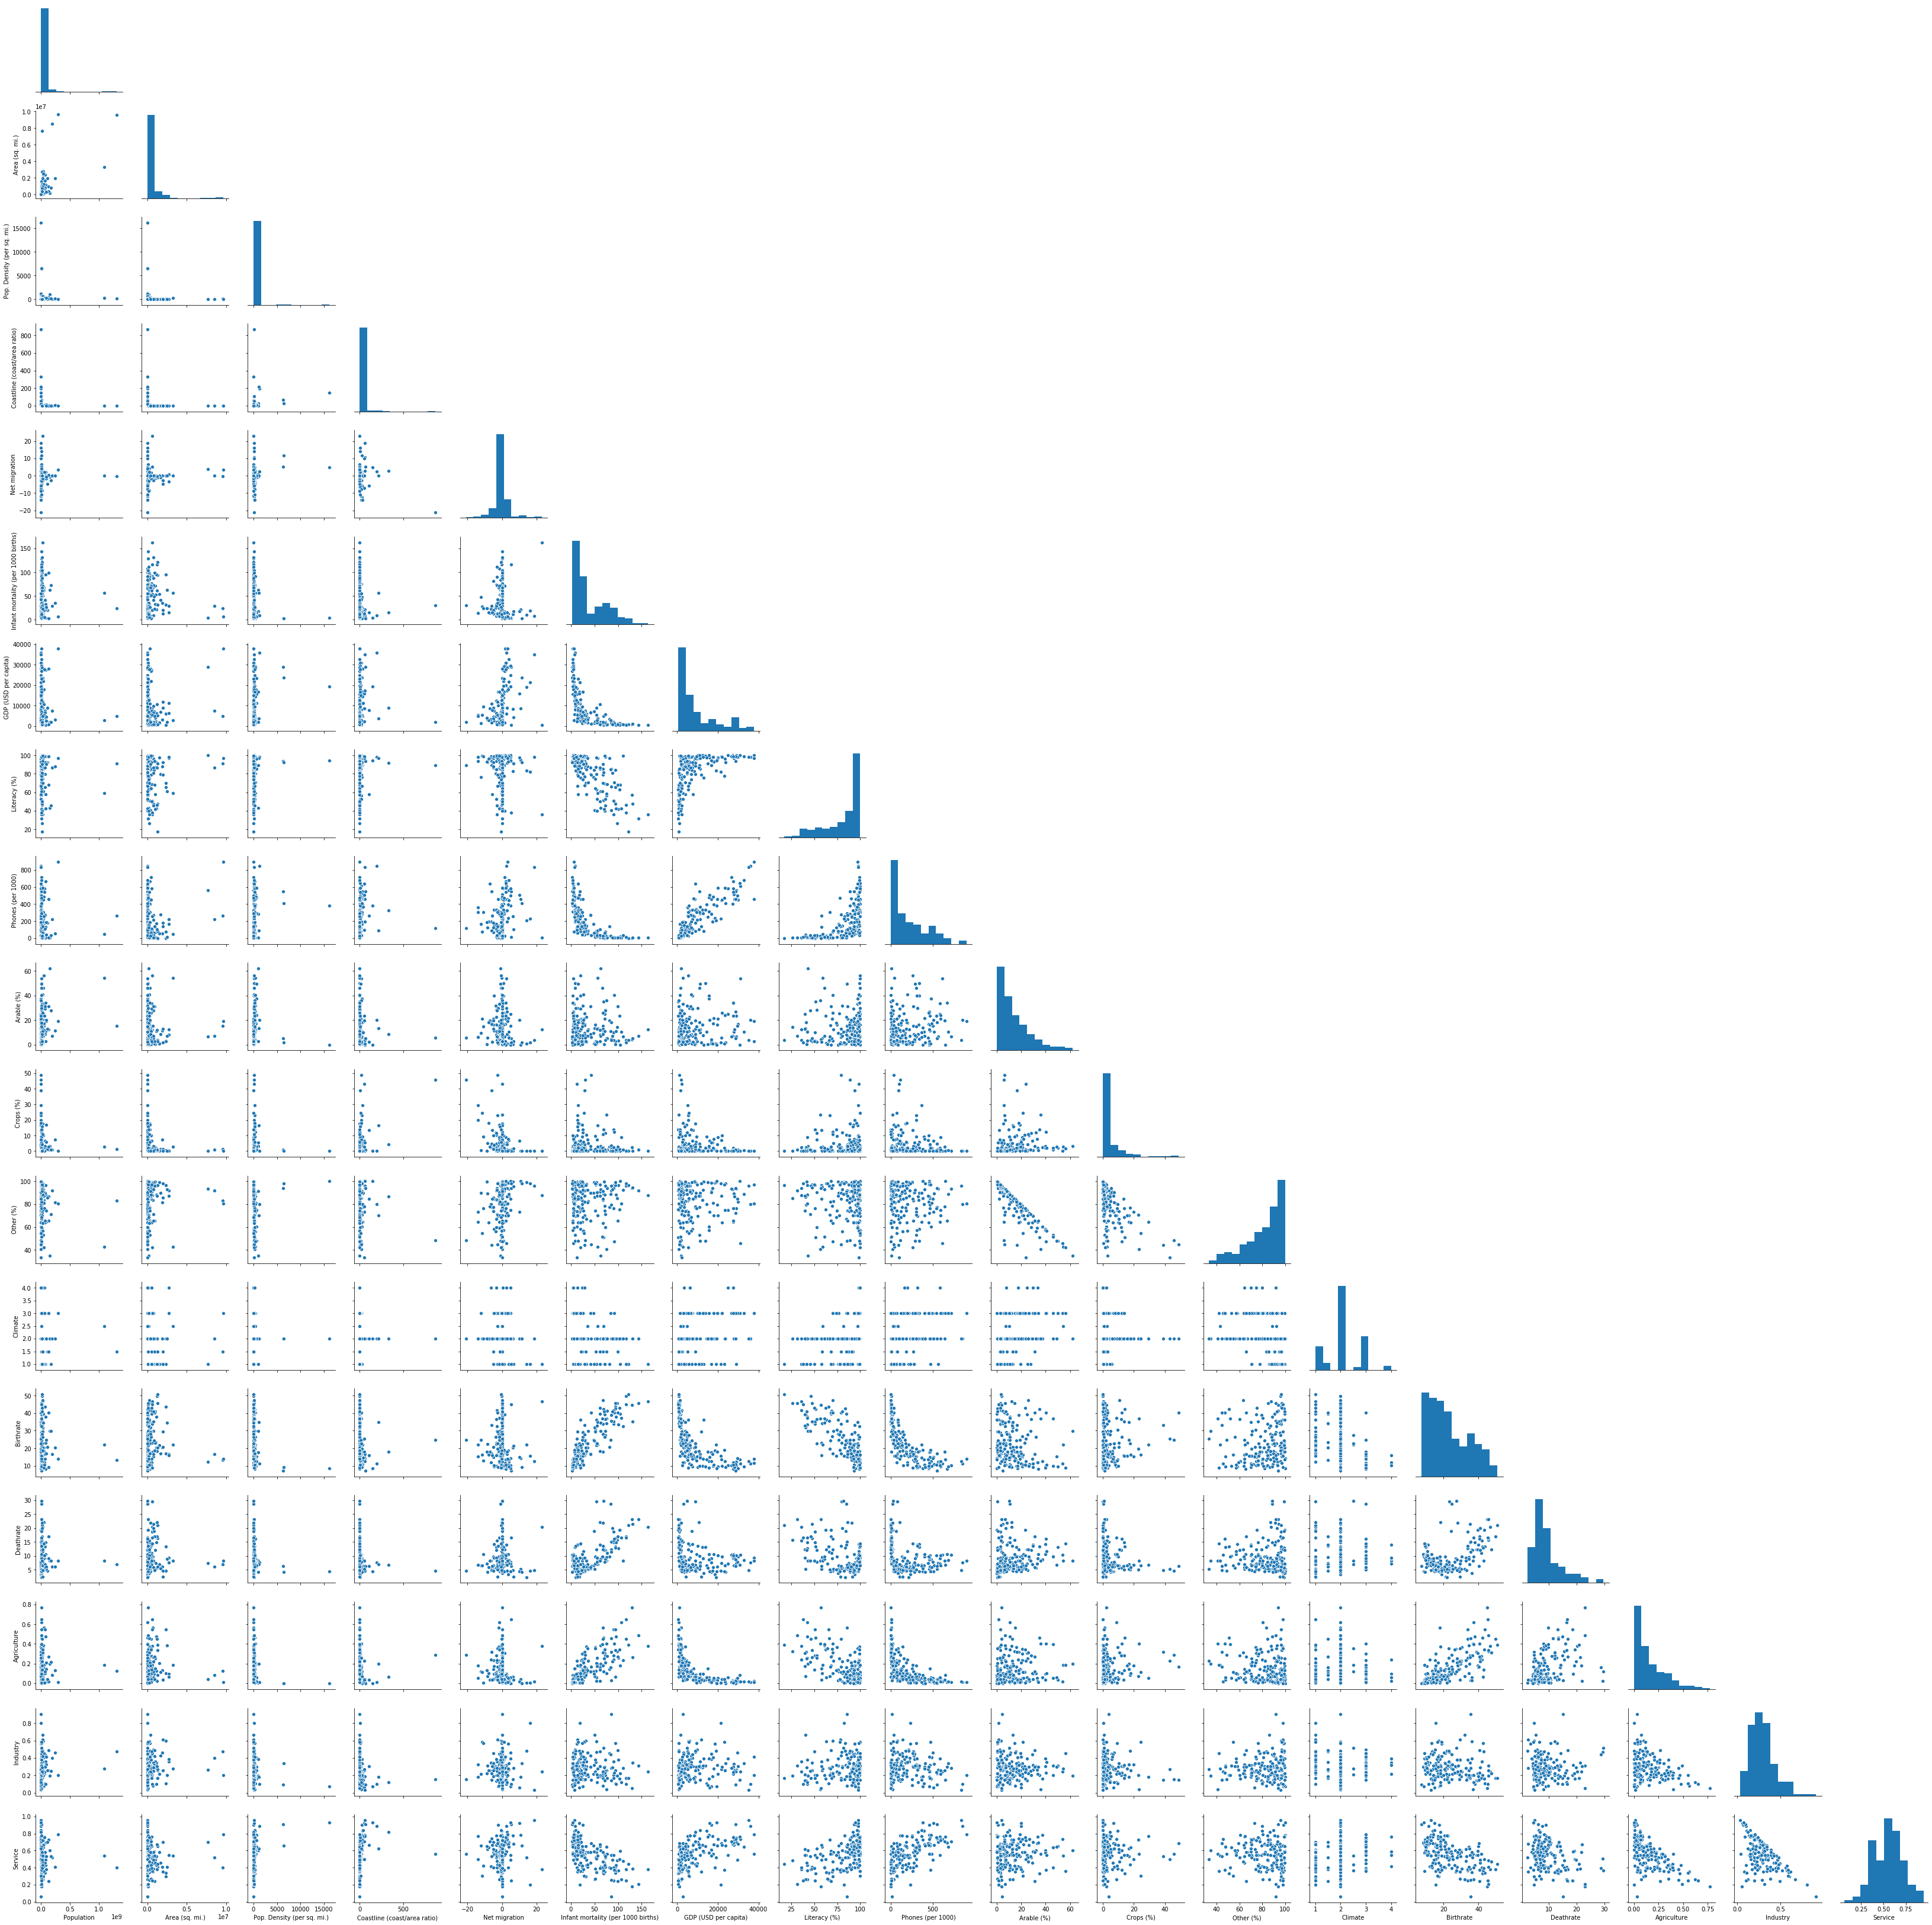

In [8]:
import seaborn as sns

sns.pairplot(data, corner=True)

**Correlación de las variables frente a GDP:**

In [9]:
data.corr()[['GDP (USD per capita)']].transpose()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
GDP (USD per capita),-0.033618,0.068356,0.190122,0.035815,0.37879,-0.63909,1.0,0.52288,0.88352,0.046465,-0.207844,0.066445,0.360567,-0.658795,-0.247562,-0.616919,0.032855,0.536551


Analizando la tabla de correlación de las variables con GDP y la matriz de dispersión:   
> Podemos ver que GDP tiene bastante correlación directa con el número de habitantes que tienen teléfono (Phones) lo cual tiene bastante sentido (si la gente de un país es más rica es muy probable que tenga teléfono móvil).    
El porcentaje de alfabetismo (Literacy) también está algo correlacionado, cuanto más pobre es el país, más número de gente analfabeta, sin embargo no es una correlación tan alta ya que en algunos países ricos también existe gente analfabeta.
>
>Por otro lado, GDP tiene una correlación algo alta, pero inversamente proporcional, con variables como la tasa de nacimientos (Birthrate), la tasa de muertes infantiles (Infant mortality) y la agricultura (Agriculture). Esto también es lógico, los países más pobres suelen tener mayor actividad agrícola, más nacimientos pero mayor número de fallecimientos.   
Además, los servicios (Services) también tiene algo de relación con el GDP, de hecho la agricultura y los servicios están bastante relacionados entre si inversamente, si la economía de un país se centra mucho en los servicios seguramente tenga una agricultura más escasa y un nivel de riqueza más alto.    
La industria (Industry) también esta relacionadad con la agricultura y los servicios pero es algo más común en todos los países idependientemente de su riqueza, por lo cual no se relaciona con GDP.

#### 2) Selección de las variables:

Para entrenar a nuestro modelo vamos a elegir aquellas variables que tengan una correlación significativa con la variable que queremos predecir, en este caso GDP.   
- Vamos a seleccionar las variables que tienen un coeficiente de correlación mayor o igual que 0,5 (de manera directa o inversa) con GDP:   

In [10]:
# Obtenemos el coeficiente de correlación de las variables
correl = data.corr()
# Eliminamos la correlación de GDP consigo misma, ya que siempre será 1
correl = correl.drop(index={'GDP (USD per capita)'})
# Mostramos las variables que se correlacionan con GDP por más de 0,5
correl[abs(correl['GDP (USD per capita)']) >= 0.5][['GDP (USD per capita)']]

,GDP (USD per capita)
Infant mortality (per 1000 births),-0.639090
Literacy (%),0.522880
Phones (per 1000),0.883520
Birthrate,-0.658795
Agriculture,-0.616919
Service,0.536551


In [43]:
# Guardamos las variables seleccionadas en data_reduced
data_reduced = pd.DataFrame(data=data[['Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)', 'Birthrate', 'Agriculture', 'Service']])

#### 3) Reescalado de las variables:

In [44]:
data_reduced.head()

,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Agriculture,Service
Country,,,,,,
Afghanistan,163.07,36.0,3.2,46.60,0.380,0.380
Albania,21.52,86.5,71.2,15.11,0.232,0.579
Algeria,31.00,70.0,78.1,17.14,0.101,0.298
Anguilla,21.03,95.0,460.0,14.17,0.040,0.780
Antigua & Barbuda,19.46,89.0,549.9,16.93,0.038,0.743


Algunas de las variables seleccionadas tienen rangos muy distintos entre si, por lo que convendría reescalarlas antes de entrenar a nuestro modelo.

In [45]:
from sklearn.preprocessing import StandardScaler

# Vamos a utilizar StandardScaler para estandarizar las variables
scaler_x = StandardScaler()
x = scaler_x.fit_transform(data_reduced)
data_scaled = pd.DataFrame(data=x, index=data_reduced.index, columns=data_reduced.columns)

data_scaled.head()

,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Agriculture,Service
Country,,,,,,
Afghanistan,3.522194,-2.322517,-0.978132,2.090732,1.478239,-1.056306
Albania,-0.492940,0.230303,-0.653602,-0.706978,0.497583,0.148249
Algeria,-0.224035,-0.603787,-0.620672,-0.526624,-0.370430,-1.552656
Anguilla,-0.506839,0.659986,1.201943,-0.790492,-0.774619,1.364910
Antigua & Barbuda,-0.551373,0.356680,1.630990,-0.545281,-0.787871,1.140947


Reescalamos también la variable a predecir:

In [50]:
scaler_y = StandardScaler()
target_scaled = scaler_y.fit_transform(data['GDP (USD per capita)'].values.reshape(-1, 1))

#### 4) Selección de los parámetros del perceptrón multicapa 

Vamos a probar con dos posibilidades:
- Perceptrón multicapa (MLP) de 1 capa oculta de 200 neuronas
- Perceptrón multicapa (MLP) de 2 capas ocultas de 50 neuronas   

Probaremos ambos modelos con distintos valores para el coeficiente de regularización ($\alpha$), usando validación cruzada, y nos quedaremos con el modelo y el $\alpha$ que maximicen el error cuadrático medio.

In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

MAX_ITER = 500

alpha_range = 10.0 ** -np.arange(1, 7) 

cv1_scores_mean=[]
cv1_scores_std=[]
cv2_scores_mean=[]
cv2_scores_std=[]

for alpha_param in alpha_range:
    mlp1=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=alpha_param, max_iter=MAX_ITER, random_state=0)
    scores1 = cross_val_score(mlp1, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv1_scores_mean.append(scores1.mean())
    cv1_scores_std.append(scores1.std())
    
    mlp2=MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=alpha_param, max_iter=MAX_ITER, random_state=0)
    scores2 = cross_val_score(mlp2, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv2_scores_mean.append(scores2.mean())
    cv2_scores_std.append(scores2.std())

Dibujamos las curvas de aprendizaje de ambos perceptrones:

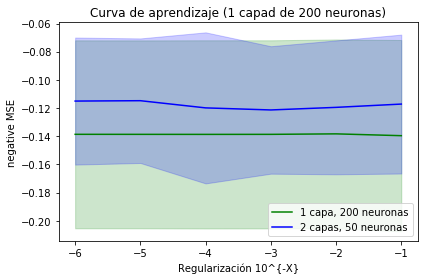

In [48]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(alpha_range), cv1_scores_mean, color="g", label="1 capa, 200 neuronas")
plt.plot(np.log10(alpha_range), cv2_scores_mean, color="b", label="2 capas, 50 neuronas")

# Dibujamos la banda de la desviación típica
lower_limit1=np.array(cv1_scores_mean)-np.array(cv1_scores_std)
upper_limit1=np.array(cv1_scores_mean)+np.array(cv1_scores_std)
plt.fill_between(np.log10(alpha_range), lower_limit1, upper_limit1, color="g", alpha=0.2)

lower_limit2=np.array(cv2_scores_mean)-np.array(cv2_scores_std)
upper_limit2=np.array(cv2_scores_mean)+np.array(cv2_scores_std)
plt.fill_between(np.log10(alpha_range), lower_limit2, upper_limit2, color="b", alpha=0.2)

# Creamos el gráfico
plt.title("Curva de aprendizaje (1 capad de 200 neuronas)")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

En ambos casos, vemos poca variación del error. Nos quedamos con el perceptrón de 2 capas de 50 neuronas que consigue un error de -0,12 frente al error de -0,14 que consigue el otro perceprtrón.   
En cuanto al $\alpha$, podemos quedarnos con $10^{-6}$ o $10^{-5}$ que alcanzan un error de algo menos de -0,12.  

El hecho de elegir un perceptrón con mayor número de capas nos proporciona un mayor nivel de abstracción que en este caso nos beneficia obteniendo mejores valores para el error que el perceptrón de solo una capa, a pesar de que este último tenga más neuronas.

#### 5) Perceptrón multicapa (Regresión lineal)

Vamos a entrenar el perceptrón elegido con todos nuestros datos para comprobar que predicciones hace.

In [52]:
from sklearn.model_selection import cross_val_predict

# Entrenamos al perceptrón elegido anteriormente
alpha_param = (10.0 ** -6)

mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=alpha_param, 
                  max_iter=500, random_state=0)

# Generamos las predicciones para el GDP
predicts_scaled = cross_val_predict(mlp, data_scaled, target_scaled.ravel(), cv=5)
# Convertimos las predicciones a la escala original
predicts = scaler_y.inverse_transform(predicts_scaled)

- Vemos la gráfica con los valores predichos por nuestro modelo frente a los valores reales de nuestro dataset:

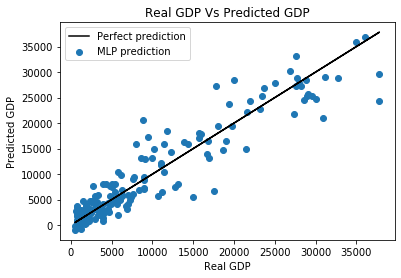

In [164]:
# dibujamos los errores: la distancia a la recta indica el nivel de error
plt.scatter(data['GDP (USD per capita)'], predicts, label='MLP prediction') 
# Pintamos la referencia de la predicción perfecta
plt.plot(data['GDP (USD per capita)'], data['GDP (USD per capita)'], color='k', label='Perfect prediction') 

plt.ylabel('Predicted GDP')
plt.xlabel('Real GDP')
plt.title('Real GDP Vs Predicted GDP')
plt.legend(loc='best')
plt.show()

En la gráfica vemos como los valores predichos por el perceptrón se asemejan bastante a los datos reales. Sin embargo en algunos casos se alejan bastante del valor real.   
Vemos que más o menos a partir de Real GDP = 10000 tenemos una mayor desviación de las predicciones.

Vamos a crear un dataframe con los valores de GDP reales y los predichos para poder compararlos mejor:

In [114]:
data_predicted = pd.DataFrame(data=predicts, index=data.index, columns={'Predicted GDP'})
data_predicted['Real GDP'] = data['GDP (USD per capita)']

- Algunos países para los que nuestro modelo ha **infraestimado** bastante el GDP:

In [172]:
data_predicted[(data_predicted['Predicted GDP'] - data_predicted['Real GDP']) < -5000 ].sort_values('Predicted GDP')

,Predicted GDP,Real GDP
Country,,
New Caledonia,5571.086883,15000.0
South Africa,5649.511288,10700.0
French Polynesia,6703.904248,17500.0
Uruguay,7563.906638,12800.0
Oman,8066.540136,13100.0
Qatar,14881.737264,21500.0
Iceland,20987.369572,30900.0
Finland,21808.183969,27400.0
Norway,24258.675694,37800.0


- Algunos países para los que nuestro modelo ha **sobreestimado** bastante el GDP:

In [173]:
data_predicted[(data_predicted['Predicted GDP'] - data_predicted['Real GDP']) > 5000].sort_values('Predicted GDP')

,Predicted GDP,Real GDP
Country,,
Guadeloupe,15830.157164,8000.0
Trinidad & Tobago,17268.944989,9500.0
Saudi Arabia,18483.295587,11800.0
Saint Kitts & Nevis,20572.186188,8800.0
Korea. South,27315.124495,17800.0
Greece,28352.334695,20000.0
Germany,33151.945917,27600.0
